# 6. Multiple Regression Analysis - Further Issues

## 6.1. Model Formulae

### 6.1.1. Data Scaling: Arithmetic Operations Within a Formula

In [1]:
from supplementaryFunctions import *
import wooldridge as woo
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

bwght = woo.dataWoo("bwght")

# regress and report coefficients:
reg = smf.ols(formula = "bwght ~ cigs + faminc", data = bwght)
results = reg.fit()

# weight in pounds
bwght["bwght_lbs"] = bwght["bwght"].div(16)
reg_lbs = smf.ols(formula ="bwght_lbs ~ cigs + faminc", data = bwght)
results_lbs = reg_lbs.fit()

#weight in pounds, transform weight variable on the fly
reg_lbs2 = smf.ols(formula ="I(bwght/16) ~ cigs + faminc", data = bwght)
results_lbs2 = reg_lbs2.fit()

# packs of cigarettes 
reg_packs = smf.ols(formula = "bwght ~ I(cigs/20) + faminc", data = bwght)
results_packs = reg_packs.fit()

# compare results:
results_dct = {"Body Weight":results.params.round(3),
              "Body Weight (lbs)": results_lbs.params.round(3),
              "Body Weight (lbs, 2)": results_lbs2.params.round(3),
              "Body Weight--Cig-packs":results_packs.params.round(3)}
pd.DataFrame(results_dct)

,Body Weight,Body Weight (lbs),"Body Weight (lbs, 2)",Body Weight--Cig-packs
I(cigs / 20),NaN,NaN,NaN,-9.268
Intercept,116.974,7.311,7.311,116.974
cigs,-0.463,-0.029,-0.029,NaN
faminc,0.093,0.006,0.006,0.093


### 6.1.2. Standardization: Beta Coefficeints

$$z_y = \frac{y - \bar{y}}{sd(y)}$$ and 
$$z_{x_i} = \frac{x_i - \bar{x_i}}{sd(x_i)}$$

Since we are measuring changes from the mean normalized by standard deviation, we do not need to include an intercept different from zero.

### Example 6.1: Effects of Pollution on Housing Prices

In [2]:
def scale(x):
    x_mean = np.mean(x)
    x_var = np.var(x, ddof=1)
    x_scaled = (x - x_mean) /np.sqrt(x_var)
    return x_scaled

# standardize and estimate:
hprice = woo.dataWoo("hprice2")
scale_keys = ["price", "nox", "crime", "rooms", "dist", "stratio"]
sc_hprice = hprice.copy()
for key in scale_keys:
    sc_hprice[key] = scale(hprice[key])
    
reg = smf.ols(formula = "price ~ 0 + nox + crime + rooms + dist + stratio",
            data = sc_hprice)
results = reg.fit()

OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.6357$$,,,,
nox,-0.3404,-7.6511,0.0,0.0445
crime,-0.1433,-4.6693,0.0,0.0307
rooms,0.5139,17.1295,0.0,0.0300
dist,-0.2348,-5.4641,0.0,0.0430
stratio,-0.2703,-9.0274,0.0,0.0299


### 6.1.3. Logarithms

$$log(y) \beta_0 + \beta_1 log(x_1) + \beta_2x2 + u$$

Using log-log form measures cross elasticities. A 1\% change in explanatory variable $i$ leads to a $\beta_i \%$ change in the dependent variable.

In [3]:
reg = smf.ols(formula = "np.log(price) ~ np.log(nox) + rooms",
             data = hprice)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.5137$$,,,,
Intercept,9.2337,49.1835,0.0,0.1877
np.log(nox),-0.7177,-10.8182,0.0,0.0663
rooms,0.3059,16.0863,0.0,0.0190


We may want to view the newly created variable, np.log(nox). To do this we can call either the dataframe with the exogenous variables or endogenous variable, or we can call the complete data frame.

In [4]:
reg.data.orig_exog

,Intercept,np.log(nox),rooms
0,1.0,1.682688,6.57
1,1.0,1.545433,6.42
2,1.0,1.545433,7.18
3,1.0,1.521699,7.00
4,1.0,1.521699,7.15
...,...,...,...
501,1.0,1.745716,6.59
502,1.0,1.745716,6.12
503,1.0,1.745716,6.98
504,1.0,1.745716,6.79


In [5]:
reg.data.orig_endog

,np.log(price)
0,10.085809
1,9.980402
2,10.454495
3,10.416311
4,10.496787
...,...
501,10.016816
502,9.933046
503,10.081592
504,9.998798


In [6]:
reg.data.frame

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000.0,0.006,5.38,6.57,4.09,1,29.600000,15.300000,4.98,10.085809,1.682688,5.690360
1,21599.0,0.027,4.69,6.42,4.97,2,24.200001,17.799999,9.14,9.980402,1.545433,5.488938
2,34700.0,0.027,4.69,7.18,4.97,2,24.200001,17.799999,4.03,10.454495,1.545433,5.488938
3,33400.0,0.032,4.58,7.00,6.06,3,22.200001,18.700001,2.94,10.416311,1.521699,5.402678
4,36199.0,0.069,4.58,7.15,6.06,3,22.200001,18.700001,5.33,10.496787,1.521699,5.402678
...,...,...,...,...,...,...,...,...,...,...,...,...
501,22400.0,0.063,5.73,6.59,2.48,1,27.299999,21.000000,9.67,10.016816,1.745715,5.609472
502,20600.0,0.045,5.73,6.12,2.29,1,27.299999,21.000000,9.08,9.933046,1.745715,5.609472
503,23899.0,0.061,5.73,6.98,2.17,1,27.299999,21.000000,5.64,10.081592,1.745715,5.609472
504,22000.0,0.110,5.73,6.79,2.39,1,27.299999,21.000000,6.48,9.998797,1.745715,5.609472


### 6.1.4. Quadratics and Polynomials

$$y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3$$ 

### Example 6.2: Effects of Pollution on Housing Prices

In [7]:
reg = smf.ols(
    formula = "np.log(price) ~ np.log(nox) + np.log(dist) + rooms + I(rooms ** 2) + stratio",
    data = hprice)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.6028$$,,,,
Intercept,13.3855,23.6295,0.0000,0.5665
np.log(nox),-0.9017,-7.8621,0.0000,0.1147
np.log(dist),-0.0868,-2.0051,0.0455,0.0433
rooms,-0.5451,-3.2946,0.0011,0.1655
I(rooms ** 2),0.0623,4.8623,0.0000,0.0128
stratio,-0.0476,-8.1293,0.0000,0.0059


### 6.1.5. Hypothesis Testing

$$log(price) = \beta_0 + \beta_1log(nox) + \beta_2log(dist) + \beta_3rooms + \beta_4rooms^2 + \beta_5stratio + u$$

Test the following hypothesis that 

$$H_0: \beta_3 = \beta_4 = 0$$    

We'll also check these separately:

$$H_0: \beta_3 =  0$$    

$$H_0: \beta_4 = 0$$    


In [8]:
hypotheses = ["rooms = 0", "I(rooms ** 2) = 0", ["rooms = 0", "I(rooms ** 2) = 0"]]
f_results = {}
for hypothesis in hypotheses:
    key = str(hypothesis)
    f_results[key] = {}
    ftest = results.f_test(hypothesis)
    f_results[key]["fstat"] = ftest.statistic
    f_results[key]["fpval"] = ftest.pvalue
pd.DataFrame(f_results).round(4)

,rooms = 0,I(rooms ** 2) = 0,"['rooms = 0', 'I(rooms ** 2) = 0']"
fstat,10.8547,23.6416,110.4188
fpval,0.0011,0.0000,0.0000


### 6.1.6. Interaction Terms

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1x_2 + u$$

### Example 6.3: Effects of Attendance on Final Exam Performance

In [9]:
attend = woo.dataWoo("attend")
reg = smf.ols(formula = "stndfnl ~ atndrte * priGPA + ACT + I(priGPA**2) + I(ACT**2)",
             data = attend)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.2287$$,,,,
Intercept,2.0503,1.5072,0.1322,1.3603
atndrte,-0.0067,-0.6561,0.5120,0.0102
priGPA,-1.6285,-3.3857,0.0008,0.4810
atndrte:priGPA,0.0056,1.2938,0.1962,0.0043
ACT,-0.1280,-1.3000,0.1940,0.0985
I(priGPA ** 2),0.2959,2.9283,0.0035,0.1010
I(ACT ** 2),0.0045,2.0829,0.0376,0.0022


$$\frac{\partial stndfnl}{\partial atndrte} = \beta_1 + \beta_6 priGPA$$

In [10]:
b = results.params
partial_effect = b["atndrte"] + 2.59 * b["atndrte:priGPA"]
partial_effect

0.007754572228608877

In [11]:
# F test for partial effect at priGPA=2.59:
f_results = {}
hypothesis = "atndrte + 2.59 * atndrte:priGPA = 0"
ftest = results.f_test(hypothesis)
f_results[hypothesis] = {"fstat": ftest.statistic,
                         "fpval": ftest.pvalue}

pd.DataFrame(f_results)

,atndrte + 2.59 * atndrte:priGPA = 0
fpval,0.003415
fstat,8.632581


## 6.2. Prediction

### 6.2.1. Confidence and Predication Intervals for Predictions

$$\theta_0 = E(y|x_1=c_1, . . ., x_k = c_k) = \beta_0 + \beta_1c_1 + \beta_2c_2 + . . . + \beta_kx_k$$

$$\hat{\theta_0} = \hat{\beta_0} + \hat{\beta_1}c_1 + \hat{\beta_2}c_2 + . . . + \hat{\beta_k}c_k$$

In [12]:
gpa2 = woo.dataWoo("gpa2")

reg = smf.ols(
    formula="colgpa ~ sat + hsperc + hsize + I(hsize**2)",
    data = gpa2)
results = reg.fit()

OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.2781$$,,,,
Intercept,1.4927,19.8118,0.0000,0.0753
sat,0.0015,22.8864,0.0000,0.0001
hsperc,-0.0139,-24.6981,0.0000,0.0006
hsize,-0.0609,-3.6895,0.0002,0.0165
I(hsize ** 2),0.0055,2.4056,0.0162,0.0023


In [13]:
cvalues1 = pd.DataFrame({"sat": [1200],
                        "hsperc": [30],
                        "hsize":[5]}, 
                        index = ["newPerson1"])
cvalues1.T

,newPerson1
sat,1200
hsperc,30
hsize,5


In [14]:
colgpa_pred1 = results.predict(cvalues1)
colgpa_pred1

newPerson1    2.700075
dtype: float64

In [15]:
cvalues2 = pd.DataFrame({"sat":[1200, 900,1400],
                        "hsperc": [30, 20, 5],
                        "hsize":[5, 3, 1]},
                       index = ["newPerson1", "newPerson2", "newPerson3"])
cvalues2.T

,newPerson1,newPerson2,newPerson3
sat,1200,900,1400
hsperc,30,20,5
hsize,5,3,1


In [16]:
colgpa_predict =results.predict(cvalues2)
colgpa_predict

newPerson1    2.700075
newPerson2    2.425282
newPerson3    3.457448
dtype: float64

### Example 6.5 

In [17]:
colgpa_PICI_95 = results.get_prediction(cvalues2).summary_frame(alpha=0.05)
colgpa_PICI_95

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.700075,0.019878,2.661104,2.739047,1.601749,3.798402
1,2.425282,0.014258,2.397329,2.453235,1.327292,3.523273
2,3.457448,0.027891,3.402766,3.512130,2.358452,4.556444


In [18]:
colgpa_PICI_99 = results.get_prediction(cvalues2).summary_frame(alpha=0.01)
colgpa_PICI_99

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.700075,0.019878,2.648850,2.751301,1.256386,4.143765
1,2.425282,0.014258,2.388540,2.462025,0.982034,3.868530
2,3.457448,0.027891,3.385572,3.529325,2.012879,4.902018


In [19]:
reg = smf.ols(
    formula="np.log(price) ~ np.log(nox) + np.log(dist) + rooms + I(rooms**2) + stratio",
    data = hprice)
results = reg.fit()

In [20]:
# predict using average values of other variables (4-8 rooms)
keys = ["nox", "dist", "stratio"]
rooms_min, rooms_max = hprice["rooms"].min(), hprice["rooms"].max()
X = pd.DataFrame({"rooms": np.linspace(rooms_min, rooms_max, num = int(rooms_max - rooms_min) * 100)})
X[keys] = hprice[keys].mean()
X

,rooms,nox,dist,stratio
0,3.560000,5.549783,3.795751,18.459289
1,3.570461,5.549783,3.795751,18.459289
2,3.580922,5.549783,3.795751,18.459289
3,3.591383,5.549783,3.795751,18.459289
4,3.601844,5.549783,3.795751,18.459289
...,...,...,...,...
495,8.738156,5.549783,3.795751,18.459289
496,8.748617,5.549783,3.795751,18.459289
497,8.759078,5.549783,3.795751,18.459289
498,8.769539,5.549783,3.795751,18.459289


In [21]:
lpr_PICI = results.get_prediction(X).summary_frame(alpha = 0.05)
lpr_PICI.index = X["rooms"]
lpr_CI = lpr_PICI[["mean", "mean_ci_lower", "mean_ci_upper"]]
lpr_CI

,mean,mean_ci_lower,mean_ci_upper
rooms,,,
3.560000,9.694446,9.474184,9.914708
3.570461,9.693388,9.474628,9.912148
3.580922,9.692343,9.475080,9.909606
3.591383,9.691312,9.475541,9.907084
3.601844,9.690295,9.476009,9.904582
...,...,...,...
8.738156,10.836670,10.680655,10.992685
8.748617,10.842357,10.685147,10.999566
8.759078,10.848057,10.689648,11.006466


<AxesSubplot:xlabel='rooms', ylabel='price'>

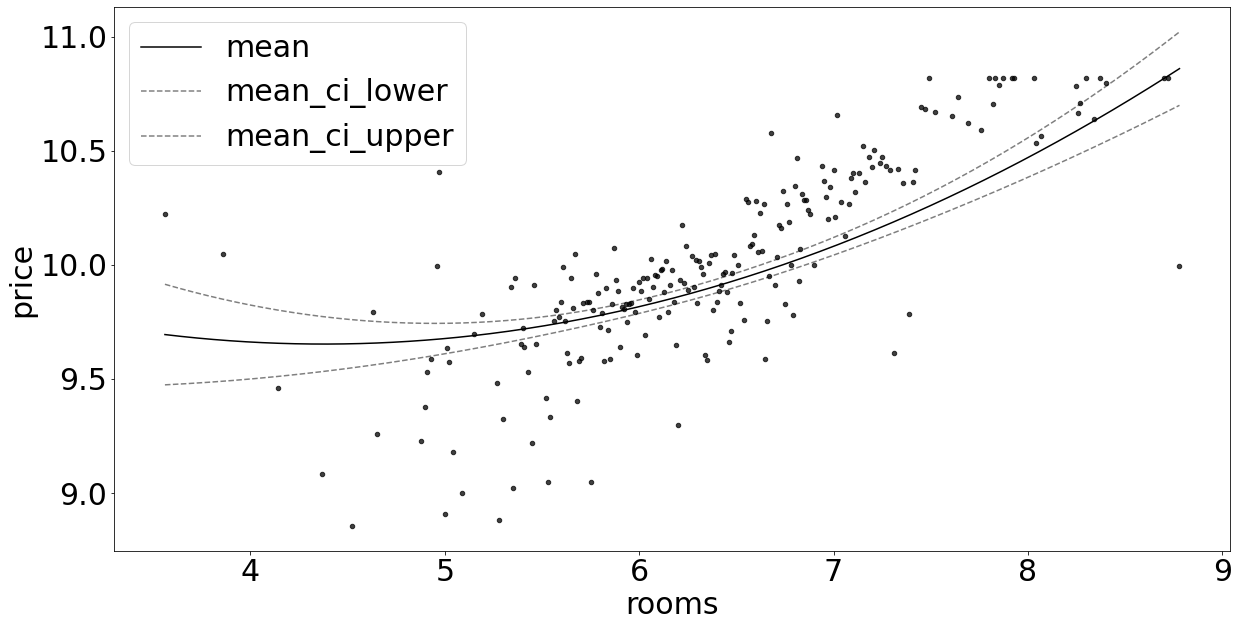

In [22]:
plt.rcParams.update({"font.size":30})
fig, ax = plt.subplots(figsize = (20,10))
for key in lpr_CI:
    ls, alpha = ("--", .5) if "ci" in key else ("-", 1)
    lpr_CI[[key]].plot(ls = ls, alpha = alpha, color = "k", ax = ax)
ax.set_xlabel("Rooms")
ax.set_ylabel("Log Price")
np.log(hprice.groupby("rooms").mean()["price"]).reset_index().plot.scatter(x = "rooms", y = "price", ax = ax, color = "k", alpha = .75)

### Let's build a function with this that we can save for later examples.

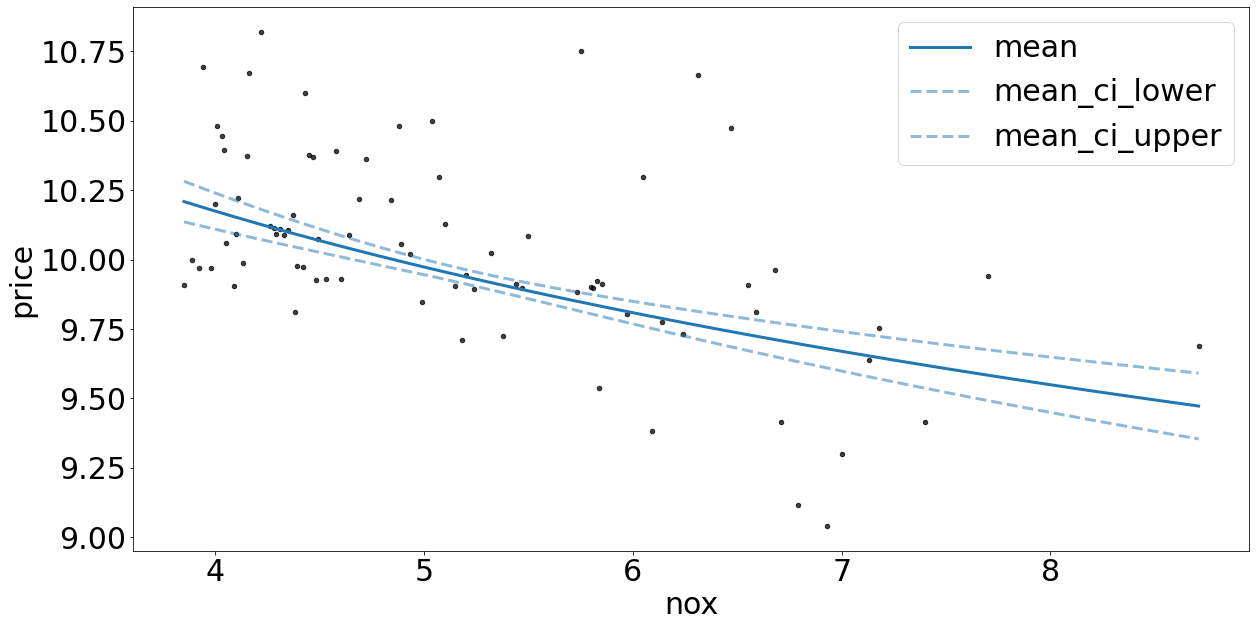

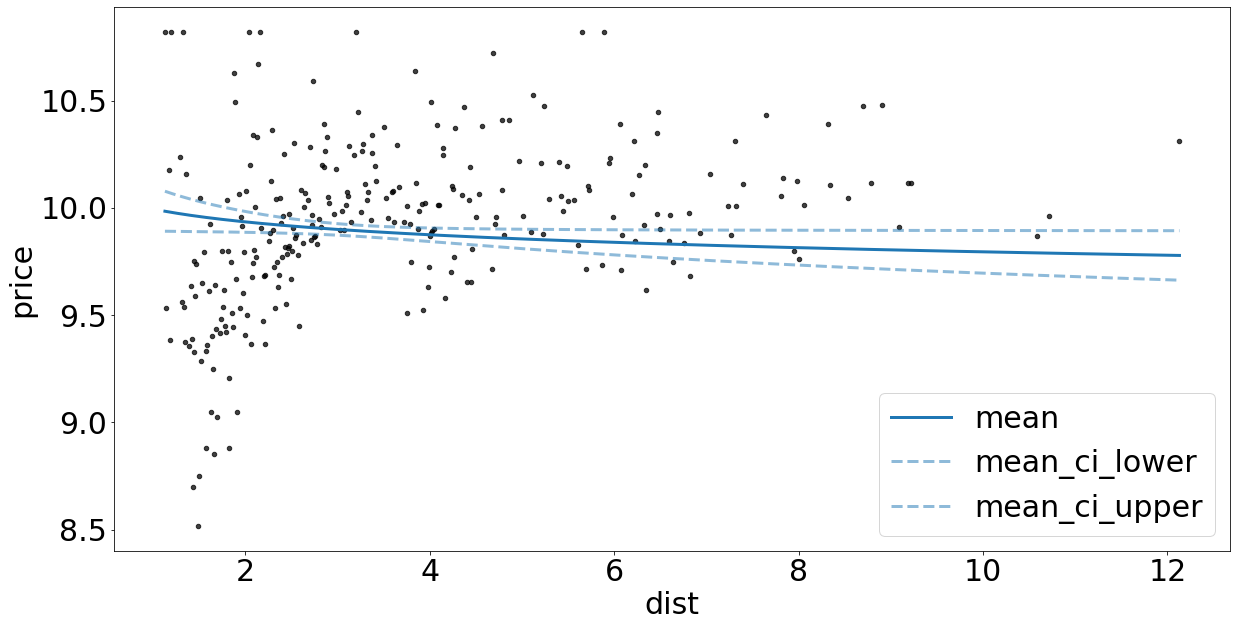

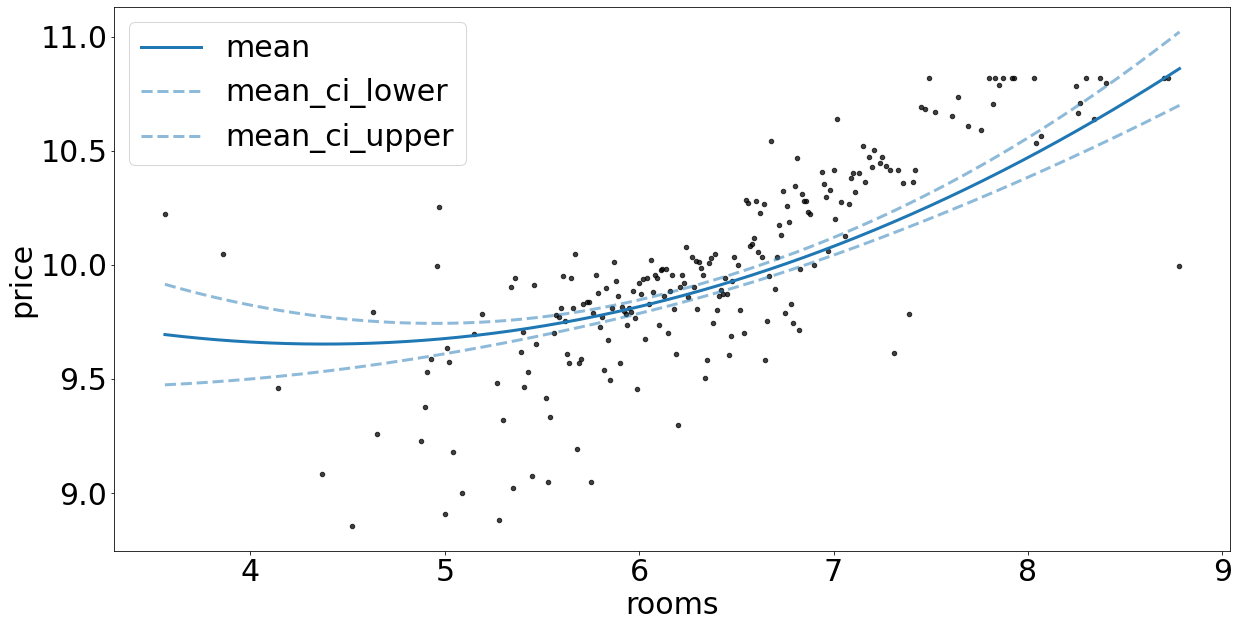

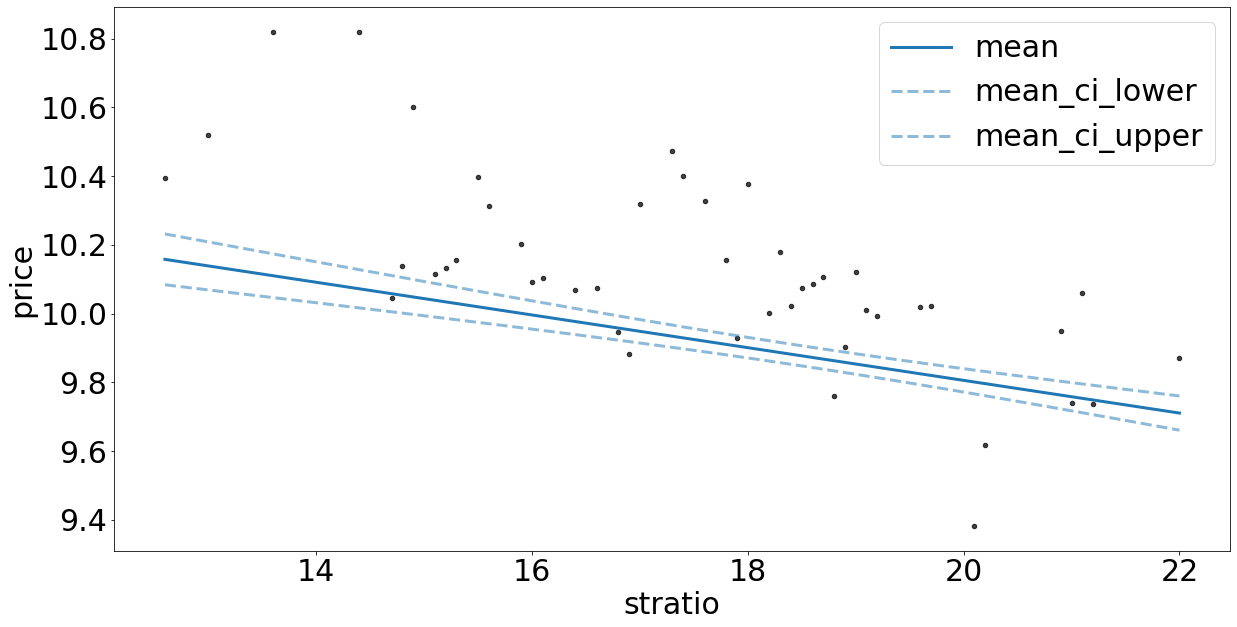

In [23]:
def build_smooth_multiple_regression_estimator(reg, orig_df):
    def find_between_from_list(lst, start, end):
        for i in range(len(lst)):
            s = lst[i]
            if start in s and end in s:
                lst[i] = (s.split(start))[1].split(end)[0]
        return lst    
    results = reg.fit()
    df = reg.data.frame
    orig_names =  find_between_from_list(list(reg.data.orig_endog.keys()) + list(reg.data.orig_exog.keys()), "(", ")")
    y_var, X_vars = orig_names[0], orig_names[1:]
    X_vars = [x for x in X_vars if x != "Intercept" and x in df.keys()]
    for x_name in X_vars:
        x_min, x_max = df[x_name].describe()[["min","max"]]
        X = pd.DataFrame({x_name: np.linspace(x_min, x_max, num = 1000)})
        keys = [x for x in X_vars if x != x_name]
        X[keys] = df[keys].mean()
        lpr_PICI = results.get_prediction(X).summary_frame(alpha = 0.05)
        lpr_PICI.index = X[x_name]
        lpr_CI = lpr_PICI[["mean", "mean_ci_lower", "mean_ci_upper"]]
        fig, ax = plt.subplots(figsize = (20,10))
        for key in lpr_CI:
            ls, alpha = ("--", .5) if "ci" in key else ("-", 1)
            lpr_CI[[key]].plot(ls = ls, 
                               linewidth = 3, 
                               alpha = alpha, color = "C0", ax = ax)
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_var)
        scatter_df = df.copy()
        orig_yname =  list(reg.data.orig_endog.keys())[0]
        orig_y = reg.data.orig_endog[orig_yname]
        scatter_df[y_var] = orig_y
        scatter_df.groupby(x_name).mean()[y_var].reset_index().plot.scatter(x = x_name, y = y_var, 
                                                                                ax = ax, color = "k", alpha = .75)
build_smooth_multiple_regression_estimator(reg, hprice)